Improvise a simple model emulator
---------

In [121]:
emulatorFactory <- function(template){
    idx_col <- c(1, 8:12)
    idx_z_lim <- 1:35
    if(template == 'Ell2'){
        data <- read.table('Ell2_flux_z.dat', header = T)[,idx]
    }else if(template == 'Ell5'){
        data <- read.table('Ell5_flux_z.dat', header = T)[,idx]
    }else{
        print('Invalid template type')
    }
    
    emulator_helper <- function(z){
        result <- c()
        for(i in 2:6){
            #interpolate in log(lambda) with max z = 1.2, beyond that return Nan (rule=1)
            interp <- approxfun(as.vector(data[idx_z_lim,1]), as.vector(log10(data[idx_z_lim,i])), rule=1)
            result <- c(result, interp(z))
        }
        return(10^result)
    }
    
    emulator <- function(z){
        if(length(z) == 1){
            return(t(as.matrix(emulator_helper(z))))
        }else{
            result <- matrix(data=NA,nrow=length(z),ncol=length(idx_col)-1)
            for(row in 1:length(z)){
                result[row,] <- emulator_helper(z[row]);
            }
            return(result)
        }
    }
        
    return(emulator)             
}

In [137]:
data <- read.table('Ell2_flux_z.dat', header = T)

In [141]:
colnames(data)

[1] "z"        "F.Ul."    "F.U."     "F.B."     "F.V."     "F.R."    
 [7] "F.I."     "F.Up."    "F.gp."    "F.rp."    "F.ip."    "F.zp."   
[13] "F.J."     "F.Ks."    "F.3.6."   "F.4.5."   "F.5.8."   "F.8.0."  
[19] "F.24."    "mag.Ul."  "mag.U."   "mag.B."   "mag.V."   "mag.R."  
[25] "mag.I."   "mag.Up."  "mag.gp."  "mag.rp."  "mag.ip."  "mag.zp." 
[31] "mag.J."   "mag.Ks."  "mag.3.6." "mag.4.5." "mag.5.8." "mag.8.0."
[37] "mag.24."

Improvise a simple catalog simulator
----------

In [142]:

get_catalog <- function(samp_size){
    frac_ell2 <- 0.5
    frac_ell5 <- 0.5
    signal_to_noise <- 10.
    z <- rnorm(n = samp_size, mean=0.5, sd=0.15)
    ell2_emulator <- emulatorFactory('Ell2')
    ell5_emulator <- emulatorFactory('Ell5')
    split_lim <- round(length(z)*0.5)
    z_ell2 <- z[1:split_lim]
    z_ell5 <- z[split_lim:length(z)]
    photometry_ell2 <- ell2_emulator(z_ell2)
    photometry_ell5 <- ell5_emulator(z_ell5)
    ell2_catalog <- cbind(z_ell2, photometry_ell2)
    ell5_catalog <- cbind(z_ell5, photometry_ell5)
    total_cat <- rbind(ell2_catalog, ell5_catalog)
    total_cat <- add_noise(total_cat, signal_to_noise)
    colnames(total_cat) <- c('z', 'u', 'g', 'r', 'i', 'z')
    return(total_cat)
}

add_noise <- function(cat, signal_to_noise){
    for(col in 2:ncol(cat)){
        for(row in 1:nrow(cat)){
         cat[row,col] <- cat[row,col] + rnorm(n=1, mean=0.0, 
                                      sd=cat[row,col]/signal_to_noise)   
        }
    }
    return(cat)
}

In [162]:
cat <- get_catalog(1000)


In [163]:
summary(cat)

       z                 u                 g                  r           
 Min.   :0.02475   Min.   :     33   Min.   :     196   Min.   :    1032  
 1st Qu.:0.40230   1st Qu.:    626   1st Qu.:    3145   1st Qu.:   11756  
 Median :0.50205   Median :   1303   Median :    6431   Median :   23916  
 Mean   :0.50151   Mean   :  12799   Mean   :   44610   Mean   :  102083  
 3rd Qu.:0.59728   3rd Qu.:   3060   3rd Qu.:   14146   3rd Qu.:   50033  
 Max.   :1.03265   Max.   :5370740   Max.   :17831484   Max.   :34112052  
       i                  z           
 Min.   :    2809   Min.   :    5161  
 1st Qu.:   29098   1st Qu.:   38310  
 Median :   47785   Median :   63279  
 Mean   :  147888   Mean   :  190306  
 3rd Qu.:   85376   3rd Qu.:  112875  
 Max.   :44150676   Max.   :57870305  

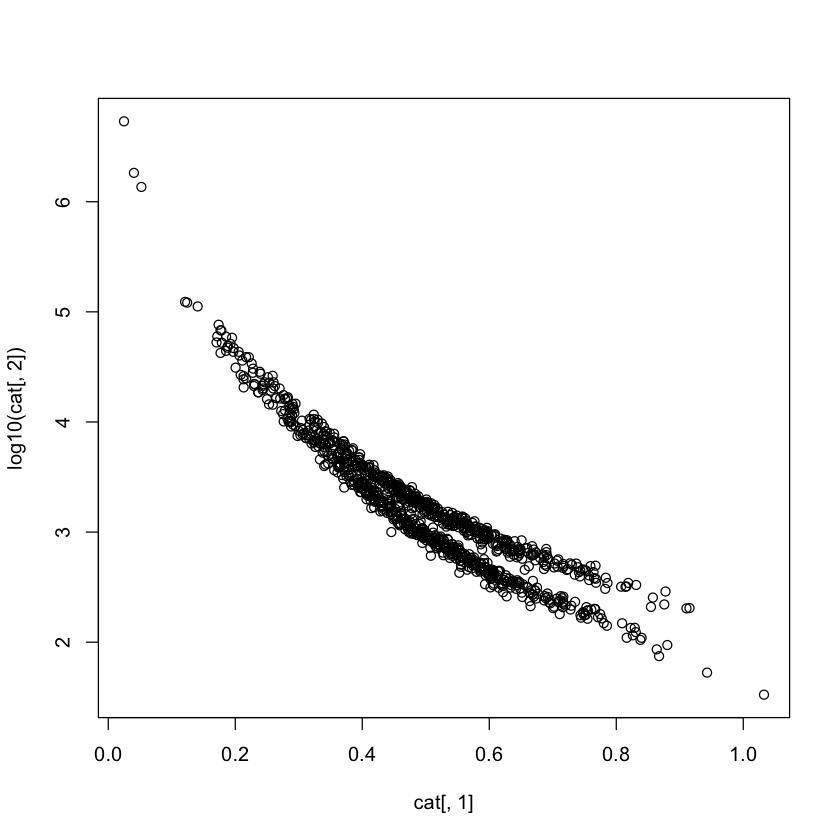

In [165]:
plot(cat[,1], log10(cat[,2]))

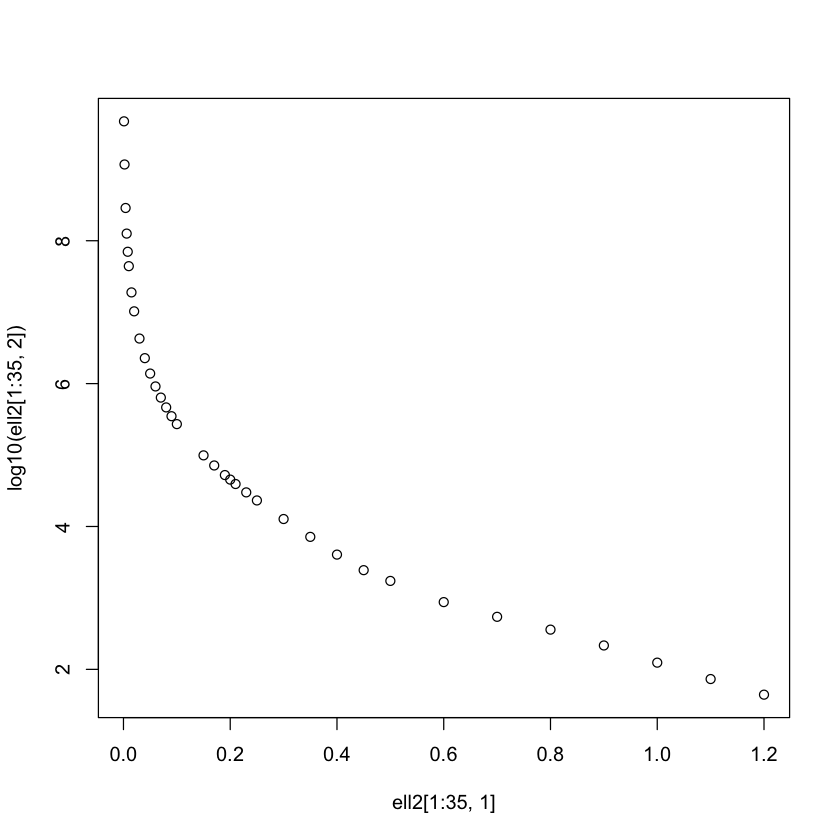

In [152]:
plot(ell2[1:35,1], log10(ell2[1:35,2]))
# plot(ell2[,1], log10(ell2[,3]))
# plot(ell2[,1], log10(ell2[,4]))
# plot(ell2[,1], log10(ell2[,5]))
# plot(ell2[,1], log10(ell2[,6]))